In [1]:
# Importando as bibliotecas
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import os

In [54]:
# Carregando a base de dados
df = pd.read_csv('SelecionadasKm.csv', sep=';')

In [55]:
df.head(15)

,ANO,KM,Viagens
0,2016,500,9610
1,2017,503,9796
2,2018,504,12864
3,2019,516,16215
4,2020,572,15611


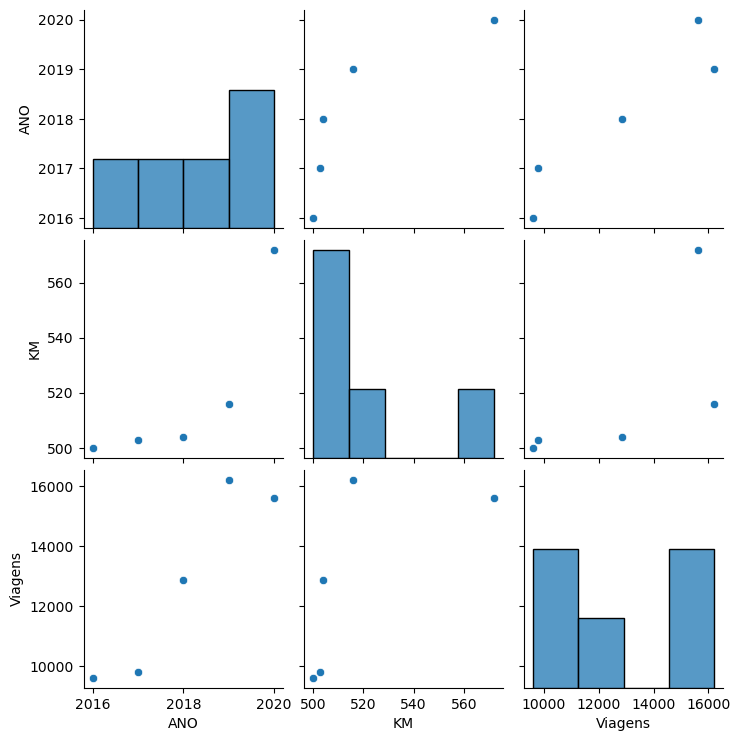

In [56]:
# GRÁFICO DE CORRELAÇÃO
sns.pairplot(df)

In [57]:
correlacoes = df.corr(method='pearson')
correlacoes

,ANO,KM,Viagens
ANO,1.000000,0.820652,0.935591
KM,0.820652,1.000000,0.654281
Viagens,0.935591,0.654281,1.000000


In [58]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [59]:
regressao = smf.ols('Viagens ~ KM ', data = df).fit()

In [60]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                Viagens   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     2.246
Date:                Fri, 13 Oct 2023   Prob (F-statistic):              0.231
Time:                        21:05:12   Log-Likelihood:                -45.357
No. Observations:                   5   AIC:                             94.71
Df Residuals:                       3   BIC:                             93.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.213e+04   2.34e+04     -0.948      0.4

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [61]:
coefs = pd.DataFrame(regressao.params)
coefs.columns = ['Coeficientes']
print(coefs)

           Coeficientes
Intercept -22128.501639
KM            67.336612


In [62]:
regressao.predict()

array([11539.80437158, 11741.81420765, 11809.15081967, 12617.19016393,
       16388.04043716])

In [63]:
x = 1800  # Substitua pelo valor real de KM de ciclovia em 2028
previsao = regressao.predict({'KM': x})

print("Previsão do Número de Viagens em 2028:", previsao[0])

Previsão do Número de Viagens em 2028: 99077.40000000008


In [64]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Dados
ano = [2016, 2017, 2018, 2019, 2020]
km = [500, 503, 504, 516, 572]
viagens = [8561, 8729, 11679, 15212, 14561]

# Crie um modelo de regressão linear
modelo = LinearRegression()

# Ajuste o modelo aos dados
X = np.array(km).reshape(-1, 1)  # Converta a lista de KM em uma matriz 2D
y = np.array(viagens)
modelo.fit(X, y)

LinearRegression()

In [65]:
# Faça uma previsão para 1800 KM de ciclovias
previsao = modelo.predict(np.array([[1800]]))
print("Previsão do Número de Viagens para 1800 KM de Ciclovias (Regressão Linear):", previsao[0])

Previsão do Número de Viagens para 1800 KM de Ciclovias (Regressão Linear): 98754.55000000002
